# NLP Assignment 3

In [116]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install hazm


Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [119]:
import os
import glob
import wave
import speech_recognition as sr

import matplotlib.pyplot as plt
from collections import Counter

import re
import string
import nltk
from nltk.corpus import stopwords
from hazm import Normalizer, word_tokenize

from wordcloud import WordCloud

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from nltk import ngrams

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [97]:
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working'
remove_folder_contents(folder_path)

# Data Preprocessing

In [98]:
Angry_dir = '/kaggle/input/urdu-speech-dataset/URDU-Dataset-master/Angry'
Happy_dir = '/kaggle/input/urdu-speech-dataset/URDU-Dataset-master/Happy'
Neutral_dir = '/kaggle/input/urdu-speech-dataset/URDU-Dataset-master/Neutral'
Sad_dir = '/kaggle/input/urdu-speech-dataset/URDU-Dataset-master/Sad'

output_dir = '/kaggle/working/'

In [99]:
# Create a dictionary to store speaker-wise file paths
Speaker_A = {}
Speaker_H = {}
Speaker_N = {}
Speaker_S = {}

## Merge Files (Angry Emotion Speechs for each Speaker)

In [100]:
# Iterate over the audio files and organize them by speaker
for file_name in os.listdir(Angry_dir):
    if file_name.endswith('.wav'):
        speaker_id = file_name.split('_')[0]  # Assuming file names are in the format "speakerID_fileID.wav"
        file_path = os.path.join(Angry_dir, file_name)
        
        if speaker_id not in Speaker_A:
            Speaker_A[speaker_id] = [file_path]
        else:
            Speaker_A[speaker_id].append(file_path)

In [101]:
# Merge audio files for each speaker
for speaker_id, file_paths in Speaker_A.items():
    merged_file_path = f"Angry_{speaker_id}.wav"
    
    # Create a new wav file for the merged audio
    Merged_A = wave.open(merged_file_path, mode='wb')
    
    # Set parameters for the merged wav file
    with wave.open(file_paths[0], 'rb') as audio:
        Merged_A.setparams(audio.getparams())
    
    # Merge audio files into one
    for file_path in file_paths:
        with wave.open(file_path, 'rb') as audio:
            Merged_A.writeframes(audio.readframes(audio.getnframes()))
    
    # Close the merged wav file
    Merged_A.close()

## Merge Files (Happy Emotion Speechs for each Speaker)

In [102]:
# Iterate over the audio files and organize them by speaker
for file_name in os.listdir(Happy_dir):
    if file_name.endswith('.wav'):
        speaker_id = file_name.split('_')[0]  # Assuming file names are in the format "speakerID_fileID.wav"
        file_path = os.path.join(Happy_dir, file_name)
        
        if speaker_id not in Speaker_H:
            Speaker_H[speaker_id] = [file_path]
        else:
            Speaker_H[speaker_id].append(file_path)

In [103]:
# Merge audio files for each speaker
for speaker_id, file_paths in Speaker_H.items():
    merged_file_path = f"Happy_{speaker_id}.wav"
    
    # Create a new wav file for the merged audio
    Merged_H = wave.open(merged_file_path, mode='wb')
    
    # Set parameters for the merged wav file
    with wave.open(file_paths[0], 'rb') as audio:
        Merged_H.setparams(audio.getparams())
    
    # Merge audio files into one
    for file_path in file_paths:
        with wave.open(file_path, 'rb') as audio:
            Merged_H.writeframes(audio.readframes(audio.getnframes()))
    
    # Close the merged wav file
    Merged_H.close()

## Merge Files (Neutral Emotion Speechs for each Speaker)

In [104]:
# Iterate over the audio files and organize them by speaker
for file_name in os.listdir(Neutral_dir):
    if file_name.endswith('.wav'):
        speaker_id = file_name.split('_')[0]  # Assuming file names are in the format "speakerID_fileID.wav"
        file_path = os.path.join(Neutral_dir, file_name)
        
        if speaker_id not in Speaker_N:
            Speaker_N[speaker_id] = [file_path]
        else:
            Speaker_N[speaker_id].append(file_path)

In [105]:
# Merge audio files for each speaker
for speaker_id, file_paths in Speaker_N.items():
    merged_file_path = f"Neutral_{speaker_id}.wav"
    
    # Create a new wav file for the merged audio
    Merged_N = wave.open(merged_file_path, mode='wb')
    
    # Set parameters for the merged wav file
    with wave.open(file_paths[0], 'rb') as audio:
        Merged_N.setparams(audio.getparams())
    
    # Merge audio files into one
    for file_path in file_paths:
        with wave.open(file_path, 'rb') as audio:
            Merged_N.writeframes(audio.readframes(audio.getnframes()))
    
    # Close the merged wav file
    Merged_N.close()

## Merge Files (Sad Emotion Speechs for each Speaker)

In [106]:
# Iterate over the audio files and organize them by speaker
for file_name in os.listdir(Sad_dir):
    if file_name.endswith('.wav'):
        speaker_id = file_name.split('_')[0]  # Assuming file names are in the format "speakerID_fileID.wav"
        file_path = os.path.join(Sad_dir, file_name)
        
        if speaker_id not in Speaker_S:
            Speaker_S[speaker_id] = [file_path]
        else:
            Speaker_S[speaker_id].append(file_path)

In [107]:
# Merge audio files for each speaker
for speaker_id, file_paths in Speaker_S.items():
    merged_file_path = f"Sad_{speaker_id}.wav"
    
    # Create a new wav file for the merged audio
    Merged_S = wave.open(merged_file_path, mode='wb')
    
    # Set parameters for the merged wav file
    with wave.open(file_paths[0], 'rb') as audio:
        Merged_S.setparams(audio.getparams())
    
    # Merge audio files into one
    for file_path in file_paths:
        with wave.open(file_path, 'rb') as audio:
            Merged_S.writeframes(audio.readframes(audio.getnframes()))
    
    # Close the merged wav file
    Merged_S.close()

## Text conversion and Preprocessing

In [109]:
def preprocess(text):
    # Normalize the text
    normalizer = Normalizer()
    text = normalizer.normalize(text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('/kaggle/input/nlpassignment-stopwords/urdu_stopwords.txt'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the tokens back into a single string
    text = ' '.join(tokens)
    
    return text

In [110]:
model = sr.Recognizer()

In [111]:
def STT(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):  # Assuming all audio files are in .wav format
            audio_file = os.path.join(folder_path, filename)

        # Load the audio file
            with sr.AudioFile(audio_file) as source:
            # Read the audio data from the file
                audio_data = model.record(source)

            # Convert speech to text
                text = model.recognize_google(audio_data, language="ur-PK")  # Specify Urdu language
                text = preprocess(text)
                
            # Create the output file path
            output_file = os.path.join(output_dir, os.path.splitext(filename)[0] + ".txt")
            
            
            # Save the transcribed text to the output file
            with open(output_file, "w", encoding="utf-8") as f:
                f.write(text)

            print(f"File '{filename}' converted and saved as '{output_file}'")

In [112]:
STT(output_dir)

File 'Neutral_SM21.wav' converted and saved as '/kaggle/working/Neutral_SM21.txt'
File 'Happy_SF3.wav' converted and saved as '/kaggle/working/Happy_SF3.txt'
File 'Happy_SF6.wav' converted and saved as '/kaggle/working/Happy_SF6.txt'
File 'Angry_SM2.wav' converted and saved as '/kaggle/working/Angry_SM2.txt'
File 'Happy_SM6.wav' converted and saved as '/kaggle/working/Happy_SM6.txt'
File 'Sad_SM27.wav' converted and saved as '/kaggle/working/Sad_SM27.txt'
File 'Sad_SM25.wav' converted and saved as '/kaggle/working/Sad_SM25.txt'
File 'Sad_SM24.wav' converted and saved as '/kaggle/working/Sad_SM24.txt'
File 'Sad_SM23.wav' converted and saved as '/kaggle/working/Sad_SM23.txt'
File 'Happy_SF1.wav' converted and saved as '/kaggle/working/Happy_SF1.txt'
File 'Neutral_SM5.wav' converted and saved as '/kaggle/working/Neutral_SM5.txt'
File 'Happy_SM19.wav' converted and saved as '/kaggle/working/Happy_SM19.txt'
File 'Happy_SM5.wav' converted and saved as '/kaggle/working/Happy_SM5.txt'
File 'Ne

# Exploratory Data Analysis

## Top 10 frequent words in transcribed text for each emotion

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


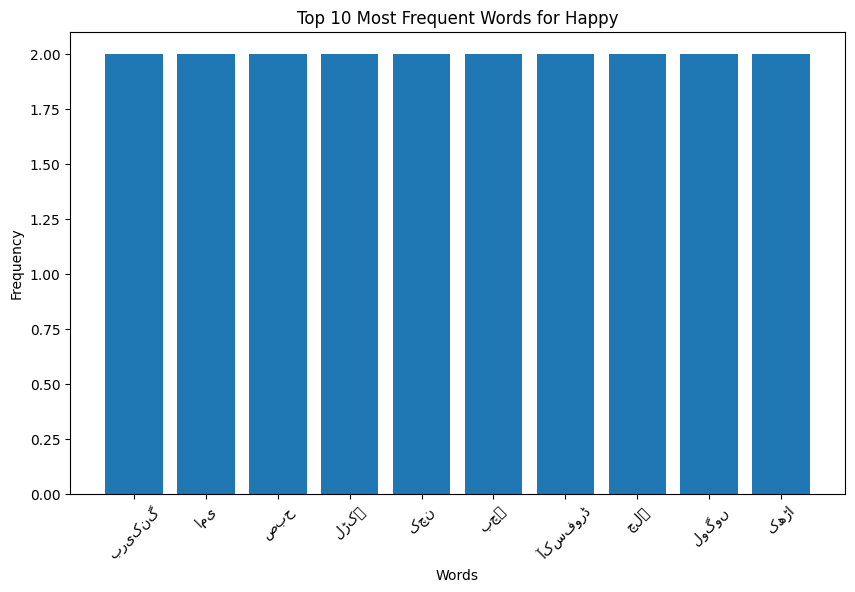

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


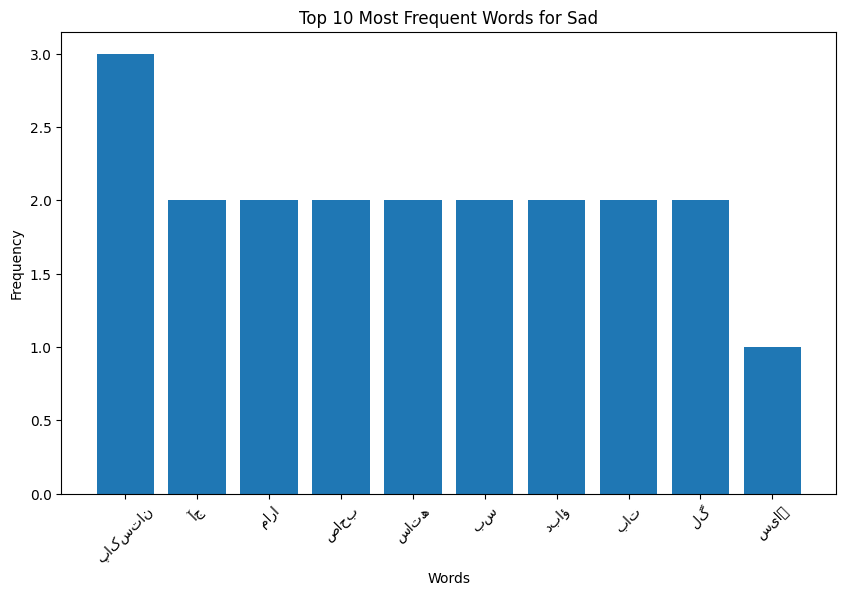

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


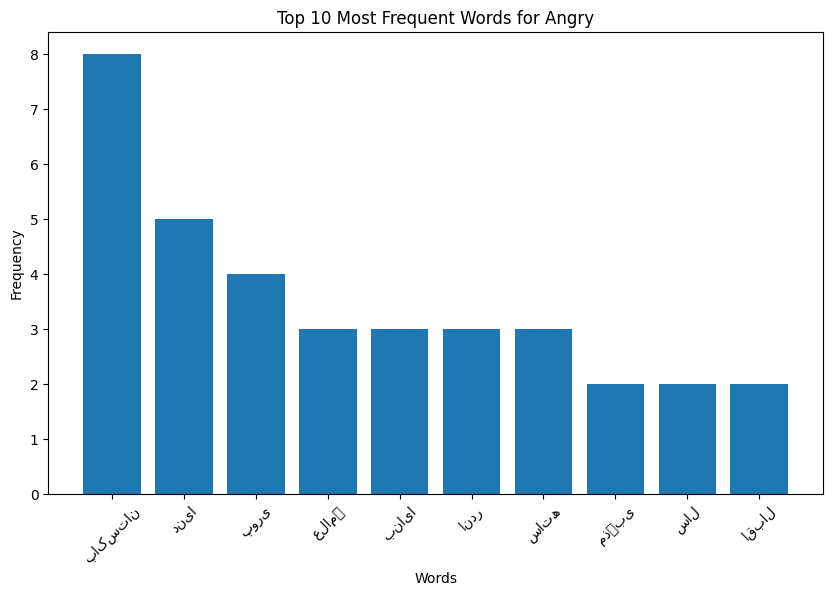

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


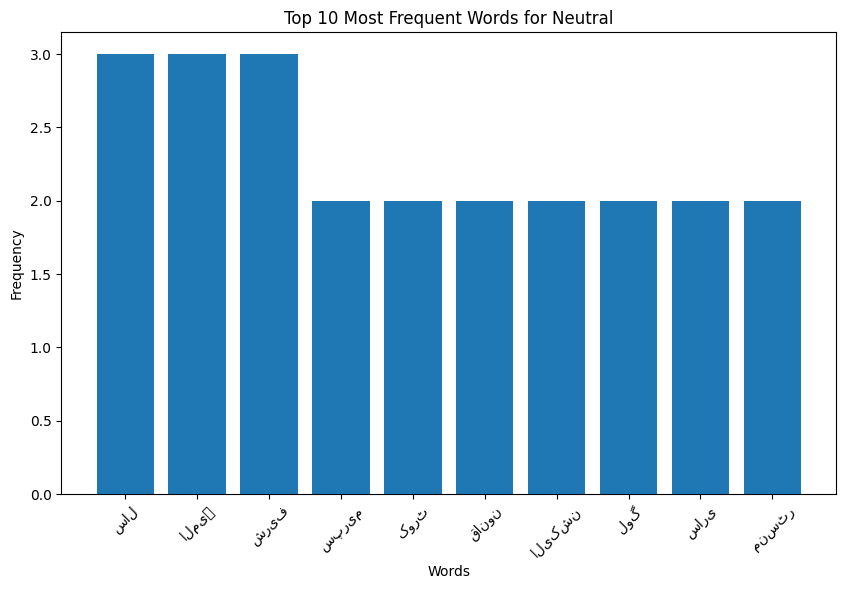

In [120]:
# Define the emotions
emotions = ["Happy", "Sad", "Angry", "Neutral"]

# Create a dictionary to store the transcribed text for each emotion
emotion_text = {emotion: '' for emotion in emotions}

# Iterate over the files in the working directory
for file_path in glob.glob("*.txt"):
    # Extract the emotion and speaker name from the file name
    file_name = os.path.basename(file_path)
    emotion, speaker_name = file_name.split("_")[:2]  # Assumes file name format: emotion_speaker.txt
    
    # Read the text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Append the text to the respective emotion in the dictionary
    emotion_text[emotion] += text

# Calculate the top 10 most frequent words for each emotion
top_words = {emotion: Counter(emotion_text[emotion].split()).most_common(10) for emotion in emotions}

# Plot the top 10 most frequent words for each emotion
for emotion in emotions:
    # Get the top words and their frequencies
    words, frequencies = zip(*top_words[emotion])
    
    # Create a bar graph with Urdu font support
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f'Top 10 Most Frequent Words for {emotion}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, font='/kaggle/input/urdufonts/Urdu_Font_File.ttf')  # Specify Urdu font
    plt.show()


## Word Cloud Analysis on transcribed text for each emotion

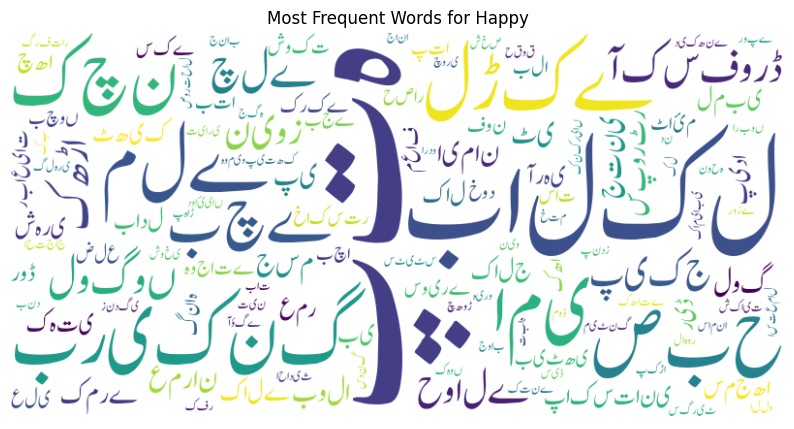

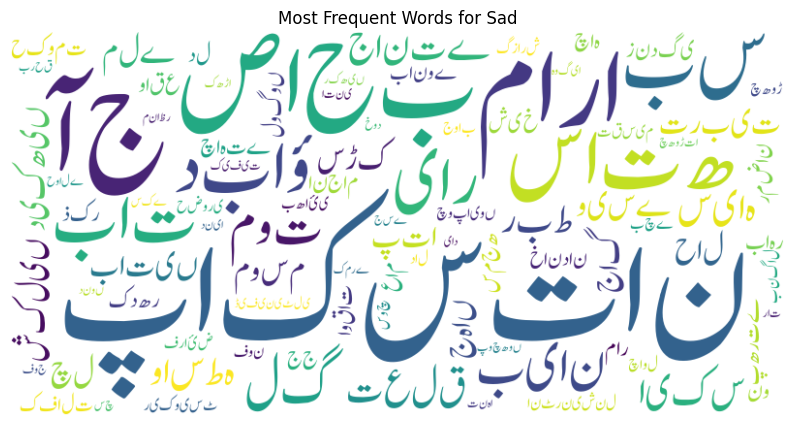

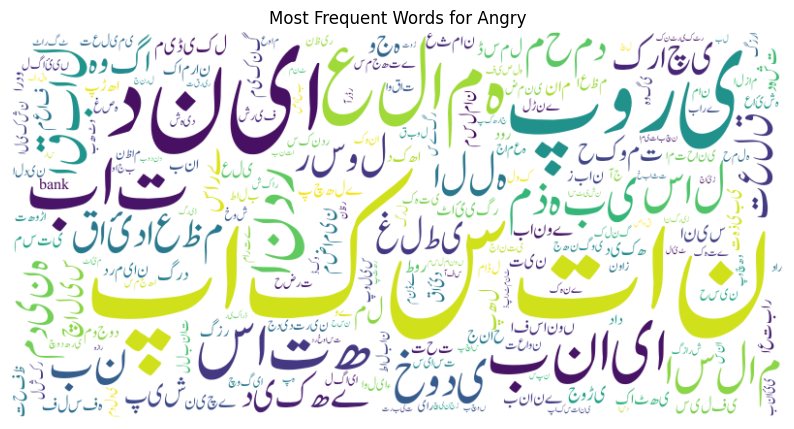

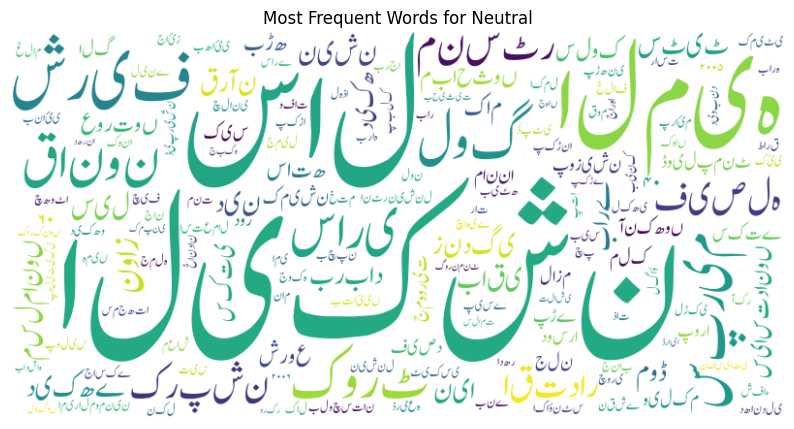

In [121]:
# Define the emotions
emotions = ["Happy", "Sad", "Angry", "Neutral"]

# Create a Word Cloud for each emotion
for emotion in emotions:
    # Initialize a Counter to count the frequency of words
    word_counts = Counter()
    
    # Iterate over the files in the working directory
    for file_path in glob.glob("*.txt"):
        # Extract the emotion and speaker name from the file name
        file_name = os.path.basename(file_path)
        file_emotion, speaker_name = file_name.split("_")[:2]  # Assumes file name format: emotion_speaker.txt
        
        # Process files for the current emotion
        if file_emotion == emotion:
            # Read the text from the file
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
            # Tokenize the text into words
            words = text.split()
            
            # Update the word counts
            word_counts.update(words)
    
    # Generate a Word Cloud for the current emotion
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/kaggle/input/urdufonts/Urdu_Font_File.ttf').generate_from_frequencies(word_counts)
    
    # Plot the Word Cloud
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Word Cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Most Frequent Words for {emotion}')
    ax.axis('off')
    
    # Show or save the image
    plt.show()

## Average length of each emotion 

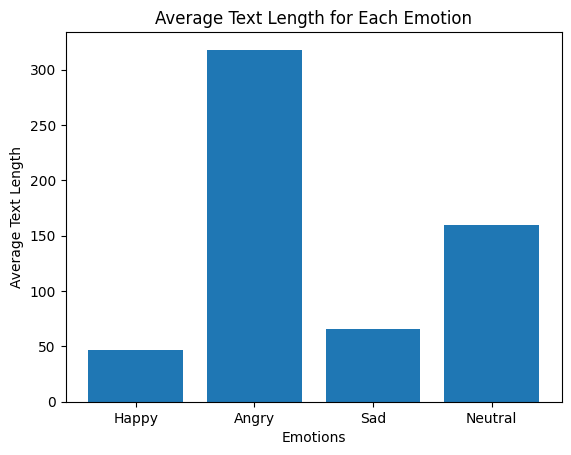

In [122]:
# Define the emotions
emotions = ['Happy', 'Angry', 'Sad', 'Neutral']  # Replace with actual emotion names

# Create a dictionary to store the average text length for each emotion
emotion_avg_length = {emotion: [] for emotion in emotions}

# Iterate over the files in the working directory
for file_path in glob.glob("*.txt"):
    # Extract the emotion and speaker name from the file name
    file_name = os.path.basename(file_path)
    emotion, speaker_name = file_name.split("_")[:2]  # Assumes file name format: emotion_speaker.txt
    
    # Read the text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Calculate the length of the text
    text_length = len(text)
    
    # Append the text length to the respective emotion in the dictionary
    emotion_avg_length[emotion].append(text_length)

# Calculate the average text length for each emotion
avg_lengths = {emotion: sum(lengths) / len(lengths) for emotion, lengths in emotion_avg_length.items()}

# Plot the average text length for each emotion in a bar graph
emotions = avg_lengths.keys()
avg_lengths = avg_lengths.values()

plt.bar(emotions, avg_lengths)
plt.title('Average Text Length for Each Emotion')
plt.xlabel('Emotions')
plt.ylabel('Average Text Length')
plt.show()

## Sentimental polarity of transcribed text for each emotion using Vader Sentiment Analysis

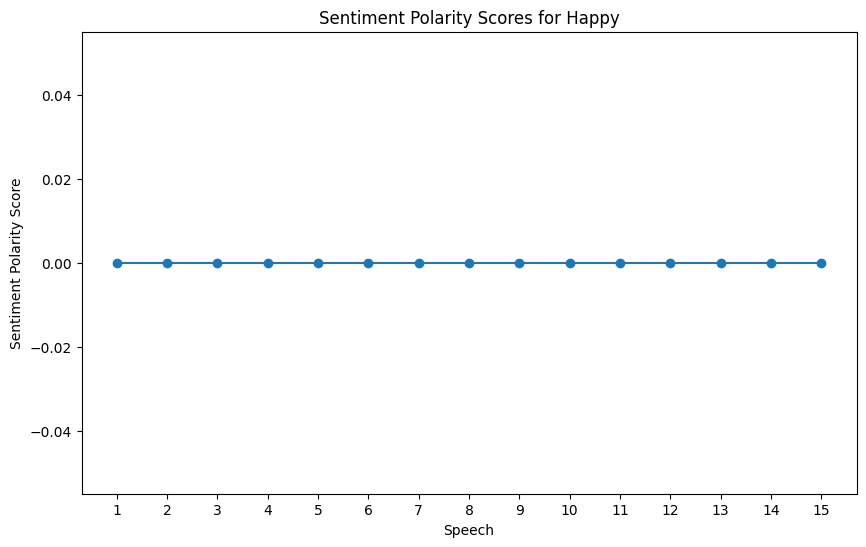

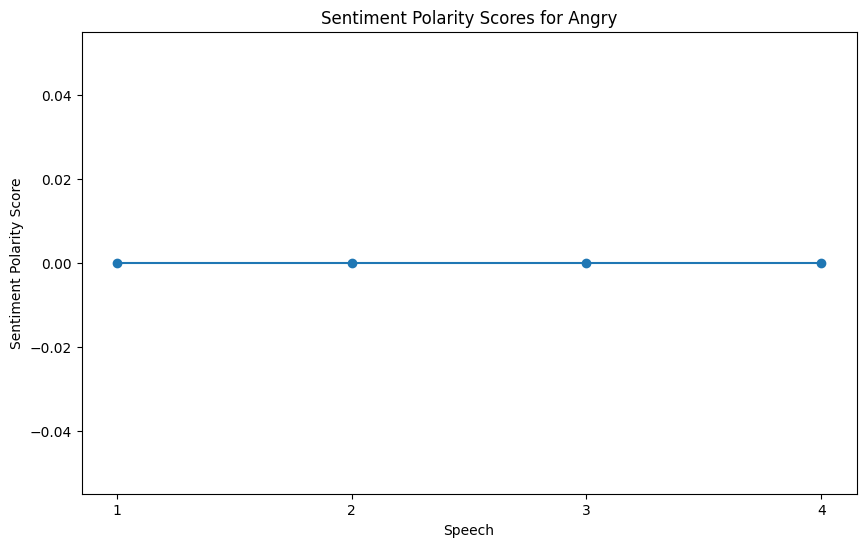

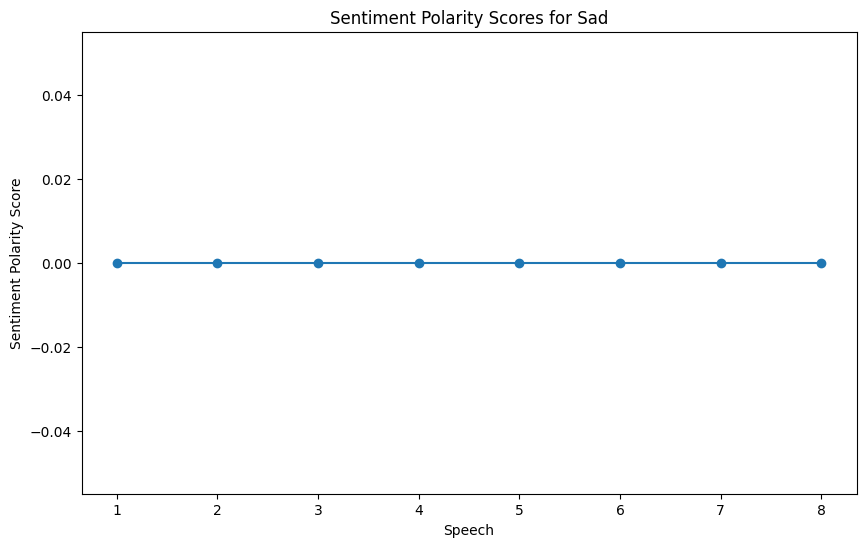

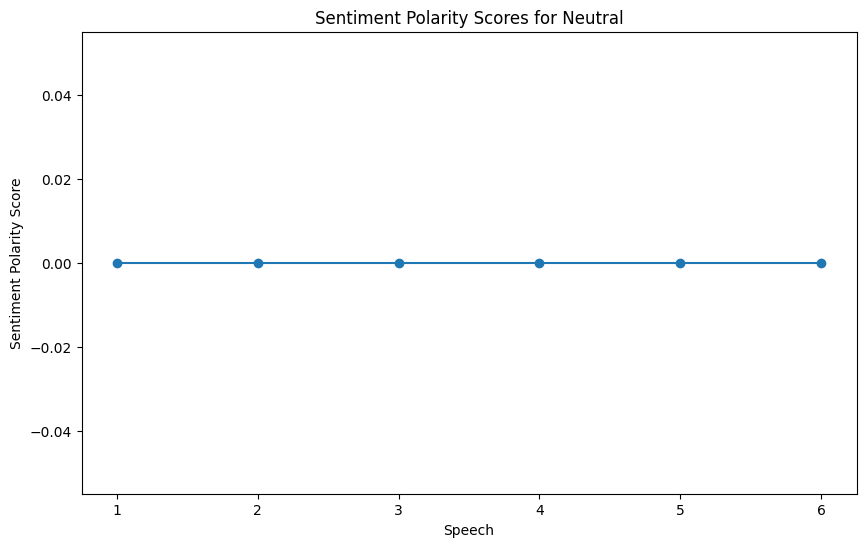

In [123]:
# Define the emotions
emotions = ['Happy', 'Angry', 'Sad', 'Neutral']

# Create a dictionary to store the sentiment polarity scores for each emotion
emotion_scores = {emotion: [] for emotion in emotions}

# Create a Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Iterate over the files in the working directory
for file_path in glob.glob("*.txt"):
    # Extract the emotion and speaker name from the file name
    file_name = os.path.basename(file_path)
    emotion, speaker_name = file_name.split("_")[:2]  # Assumes file name format: emotion_speaker.txt
    
    # Read the text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Perform sentiment analysis on the text
    sentiment_scores = analyzer.polarity_scores(text)
    
    # Append the sentiment polarity score to the respective emotion in the dictionary
    emotion_scores[emotion].append(sentiment_scores['compound'])

# Plot the sentiment polarity scores for each emotion
for emotion in emotions:
    # Get the sentiment polarity scores
    scores = emotion_scores[emotion]
    
    # Create a line graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o')
    plt.title(f'Sentiment Polarity Scores for {emotion}')
    plt.xlabel('Speech')
    plt.ylabel('Sentiment Polarity Score')
    plt.xticks(range(1, len(scores) + 1))
    plt.show()

## Top 10 Bigrams and Trigrams in transcribed text for each emotion

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


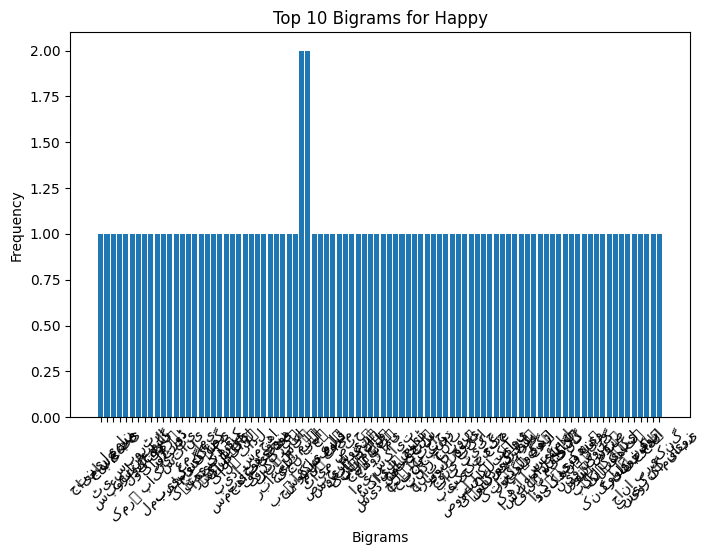

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


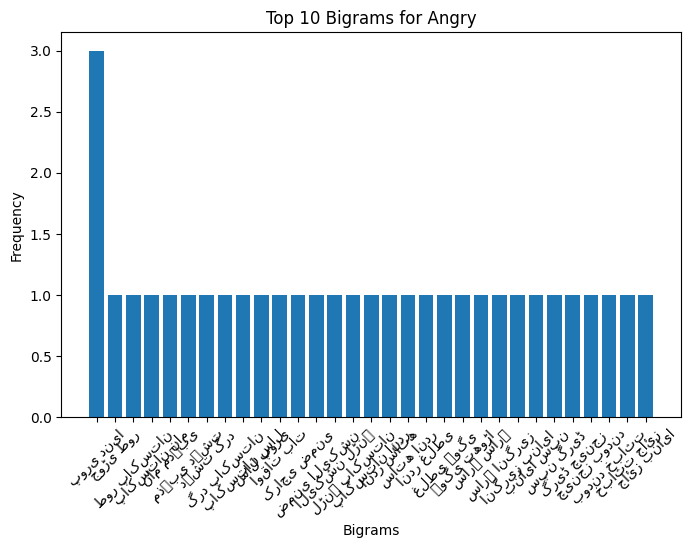

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


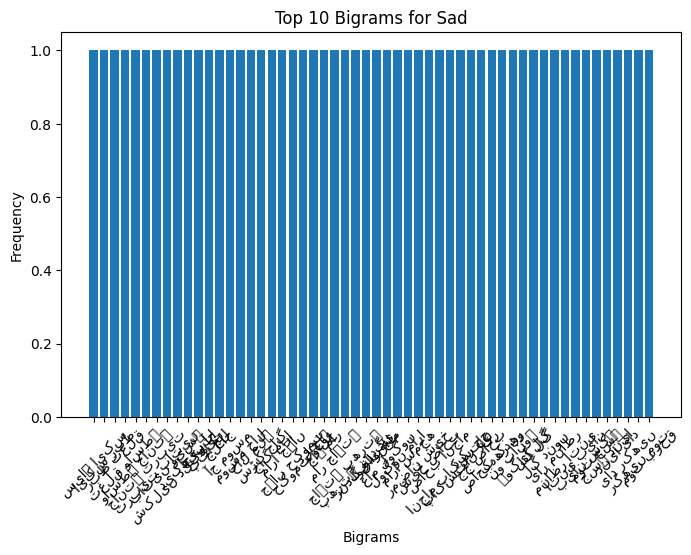

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


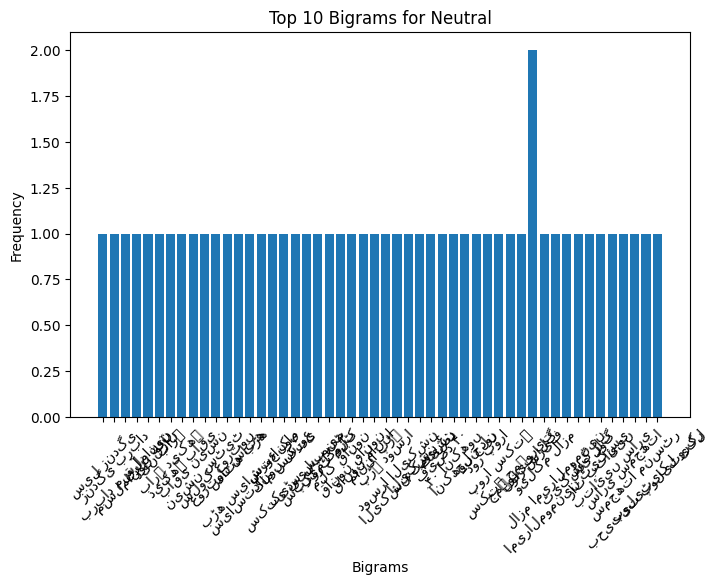

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


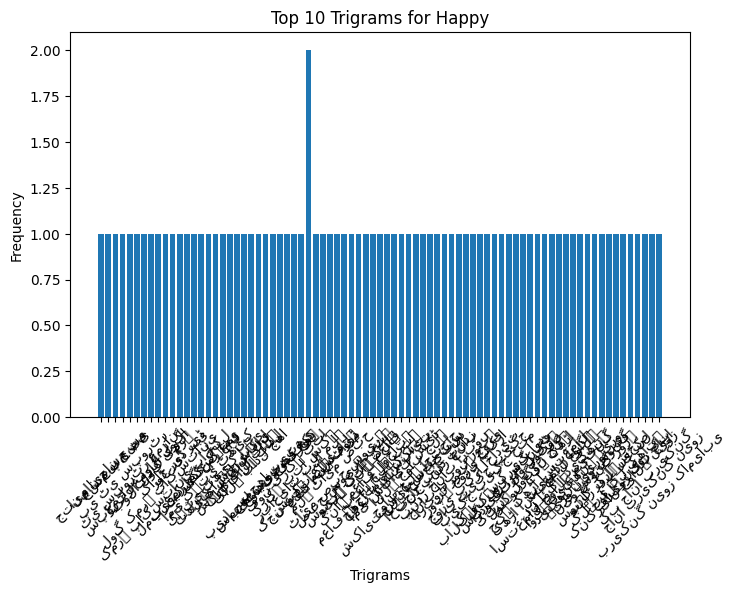

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


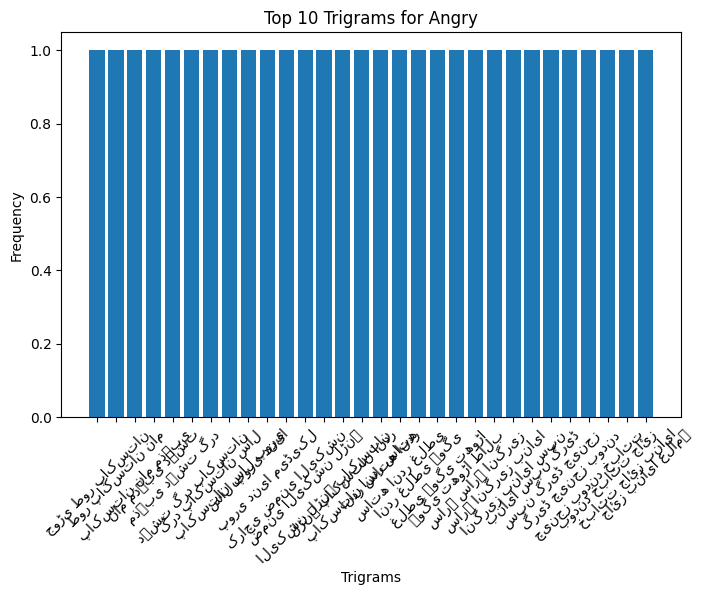

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


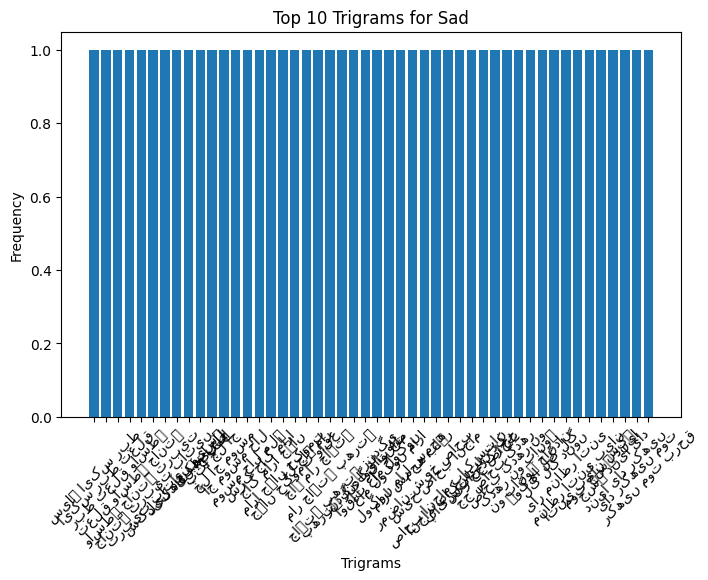

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


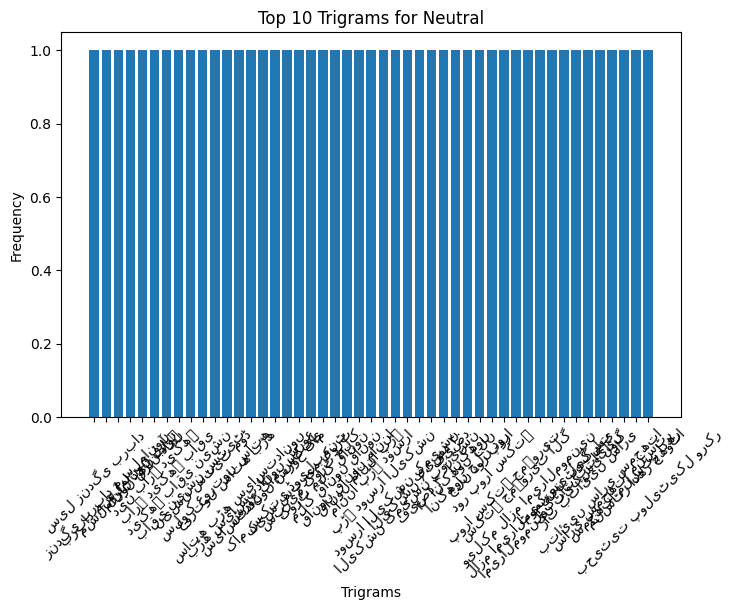

In [124]:
# Define the emotions
emotions = ['Happy', 'Angry', 'Sad', 'Neutral']  # Replace with actual emotion names

# Create a dictionary to store the top bigrams and trigrams for each emotion
emotion_bigrams = {emotion: [] for emotion in emotions}
emotion_trigrams = {emotion: [] for emotion in emotions}

# Iterate over the files in the working directory
for file_path in glob.glob("*.txt"):
    # Extract the emotion and speaker name from the file name
    file_name = os.path.basename(file_path)
    emotion, speaker_name = file_name.split("_")[:2]  # Assumes file name format: emotion_speaker.txt
    
    # Read the text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Tokenize the text into words
    words = text.split()
    
    # Generate the bigrams and trigrams
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))
    
    # Count the frequency of each bigram and trigram
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)
    
    # Get the top 10 most frequent bigrams and trigrams for the emotion
    top_bigrams = bigram_counts.most_common(10)
    top_trigrams = trigram_counts.most_common(10)
    
    # Append the top bigrams and trigrams to the respective emotion in the dictionary
    emotion_bigrams[emotion].extend(top_bigrams)
    emotion_trigrams[emotion].extend(top_trigrams)

# Plot the top 10 most frequent bigrams for each emotion
for emotion in emotions:
    top_bigrams = emotion_bigrams[emotion]
    x_labels = [' '.join(bigram) for bigram, count in top_bigrams]
    y_values = [count for bigram, count in top_bigrams]
    
    plt.figure(figsize=(8, 5))
    plt.bar(x_labels, y_values)
    plt.title(f'Top 10 Bigrams for {emotion}')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot the top 10 most frequent trigrams for each emotion
for emotion in emotions:
    top_trigrams = emotion_trigrams[emotion]
    x_labels = [' '.join(trigram) for trigram, count in top_trigrams]
    y_values = [count for trigram, count in top_trigrams]
    
    plt.figure(figsize=(8, 5))
    plt.bar(x_labels, y_values)
    plt.title(f'Top 10 Trigrams for {emotion}')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Text Classification on the generated transcription using scikit-learn library

In [125]:
Data = []
Labels = []

# Get the list of text files in the working directory
file_list = [filename for filename in os.listdir('.') if filename.endswith('.txt')]

for filename in file_list:
    # Extract the first name from the filename
    file_name = filename.split('_')[0]

    # Read the contents of the file
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        Data.append(text)
        
        # Extract the label from the filename or any other logic you have
        Labels.append(file_name)

In [126]:
DataFrame = pd.DataFrame({'text': Data, 'label': Labels})
DataFrame.shape

(33, 2)

In [127]:
DataFrame.head()

,text,label
0,جوڑی طور پاکستان نام مذہبی دہشت گرد پاکستان سا...,Angry
1,جتنی ایمان جسم پی ٹی سپورٹر عمران بولا لوگ کمر...,Happy
2,سیل زندگی برباد مسلمانوں قرآن دین بارے دیکھے ب...,Neutral
3,سلوک عورتوں ساتھ بڑھ سیاستدانوں شروع کام سکتی ...,Neutral
4,اوقات بات,Angry


## Preparing Data for further processing

In [129]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(DataFrame['text'], DataFrame['label'], test_size=0.2, random_state=42)
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((26,), (26,), (7,), (7,))

In [130]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(Xtrain)
X_test_vectorized = vectorizer.transform(Xtest)

In [131]:
Model = LinearSVC()
Model.fit(X_train_vectorized, Ytrain)

LinearSVC()

In [134]:
Ypred = Model.predict(X_test_vectorized)

In [136]:
Model.score(X_test_vectorized, Ytest)

0.7142857142857143